In [9]:
import json
import time
import pandas as pd
from os.path import expanduser
import sys
import os
import numpy as np
import glob

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199


In [2]:
## Install Develop mode

os.chdir(os.path.join(expanduser('~'),'tacc-work/sd2nb/pysd2cat'))
!{sys.executable} setup.py develop --user --uninstall
!{sys.executable} setup.py develop --user 
os.chdir(os.pardir)





running develop
Removing /home/jupyter/tacc-work/jupyter_packages/lib/python3.6/site-packages/pysd2cat.egg-link (link to src)
Removing pysd2cat 0.1 from easy-install.pth file
running develop
running egg_info
writing src/pysd2cat.egg-info/PKG-INFO
writing dependency_links to src/pysd2cat.egg-info/dependency_links.txt
writing requirements to src/pysd2cat.egg-info/requires.txt
writing top-level names to src/pysd2cat.egg-info/top_level.txt
reading manifest file 'src/pysd2cat.egg-info/SOURCES.txt'
writing manifest file 'src/pysd2cat.egg-info/SOURCES.txt'
running build_ext
Creating /home/jupyter/tacc-work/jupyter_packages/lib/python3.6/site-packages/pysd2cat.egg-link (link to src)
Adding pysd2cat 0.1 to easy-install.pth file

Installed /home/jupyter/tacc-work/sd2nb/pysd2cat/src
Processing dependencies for pysd2cat==0.1
Searching for FlowCytometryTools==0.5.0
Best match: FlowCytometryTools 0.5.0
Adding FlowCytometryTools 0.5.0 to easy-install.pth file

Using /home/jupyter/tacc-work/jupyter_pa

In [3]:
## Install non-Develop mode

#!{sys.executable} -m pip uninstall -y pysd2cat 
#!{sys.executable} -m pip install git+https://gitlab.sd2e.org/dbryce/pysd2cat --user 

In [4]:
from pysd2cat import data
from pysd2cat.data import pipeline 
from pysd2cat.data import pipeline_od
from pysd2cat.analysis import threshold as thold
from pysd2cat.analysis import live_dead_classifier as ldc
from pysd2cat.analysis import live_dead_analysis as lda
from pysd2cat.plot import plot
from pysd2cat.analysis.Names import Names
from pysd2cat.analysis import calibrated_od_analysis as coa
from pysd2cat.plot import od_plot

%reload_ext autoreload
%autoreload 2


/home/jupyter/tacc-work/sd2nb/pysd2cat/src/pysd2cat/analysis/live_dead_analysis.py:7: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')


In [5]:
## Get Dataframe with all calibrated OD data

data = pipeline_od.get_etl_od_data()
out_dir = os.path.join(expanduser("~"), 'tacc-work/xplan-reactor/data/pipeline/od_corrected')
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

pipeline_od.make_etl_od_datafiles(data, out_dir)
od_files = [x for x in glob.glob(os.path.join(out_dir, "*.csv"))       
            if  x.find("_ct") == -1]
#print(od_files)
df = pipeline_od.get_all_sample_corrected_od_dataframe(od_files)
df

,Sample,uM_FITC/OD600,uM_FITC,OD600,passQC,Sample_ID,experiment_id,filename,lab,media,...,strain,strain_circuit,strain_input_state,temperature,pre_uM_FITC/OD600,pre_uM_FITC,pre_OD600,pre_passQC,pre_Sample_ID,pre_sample_id
0,W303dip1,130.297443,94.309632,0.723803,True,sample.transcriptic.aq1bts7srqt452,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/home/jupyter/sd2e-community/uploads/transcrip...,Transcriptic,Synthetic_Complete,...,W303,NaN,NaN,30.0,142.203631,83.849924,0.589647,True,sample.transcriptic.aq1btphfuwjne6,sample.transcriptic.aq1btphfuwjne6
1,W303dip1,222.567478,124.823091,0.560833,True,sample.transcriptic.aq1bts7srtfkff,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/home/jupyter/sd2e-community/uploads/transcrip...,Transcriptic,Synthetic_Complete,...,W303,NaN,NaN,30.0,142.203631,83.849924,0.589647,True,sample.transcriptic.aq1btphfuwjne6,sample.transcriptic.aq1btphfuwjne6
2,W303dip1,244.677792,95.670691,0.391007,True,sample.transcriptic.aq1bts7sru5gb5,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/home/jupyter/sd2e-community/uploads/transcrip...,Transcriptic,Synthetic_Complete,...,W303,NaN,NaN,30.0,142.203631,83.849924,0.589647,True,sample.transcriptic.aq1btphfuwjne6,sample.transcriptic.aq1btphfuwjne6
3,W303dip1,184.731106,97.171530,0.526016,True,sample.transcriptic.aq1bts7srqykm7,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/home/jupyter/sd2e-community/uploads/transcrip...,Transcriptic,Synthetic_Complete,...,W303,NaN,NaN,30.0,129.044548,86.449344,0.669919,True,sample.transcriptic.aq1btphfuwkrh9,sample.transcriptic.aq1btphfuwkrh9
4,W303dip1,164.453408,97.428069,0.592436,True,sample.transcriptic.aq1bts7srsfsqj,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/home/jupyter/sd2e-community/uploads/transcrip...,Transcriptic,Synthetic_Complete,...,W303,NaN,NaN,30.0,129.044548,86.449344,0.669919,True,sample.transcriptic.aq1btphfuwkrh9,sample.transcriptic.aq1btphfuwkrh9
5,W303dip1,226.825145,108.429710,0.478032,True,sample.transcriptic.aq1bts7sru9vq7,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/home/jupyter/sd2e-community/uploads/transcrip...,Transcriptic,Synthetic_Complete,...,W303,NaN,NaN,30.0,129.044548,86.449344,0.669919,True,sample.transcriptic.aq1btphfuwkrh9,sample.transcriptic.aq1btphfuwkrh9
6,W303dip1,291.917163,96.995338,0.332270,True,sample.transcriptic.aq1bts7srr4yzc,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/home/jupyter/sd2e-community/uploads/transcrip...,Transcriptic,Synthetic_Complete,...,W303,NaN,NaN,30.0,104.906006,86.925777,0.828606,True,sample.transcriptic.aq1btphfuwnxq9,sample.transcriptic.aq1btphfuwnxq9
7,W303dip1,581.970866,101.722739,0.174790,False,sample.transcriptic.aq1bts7srshywp,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/home/jupyter/sd2e-community/uploads/transcrip...,Transcriptic,Synthetic_Complete,...,W303,NaN,NaN,30.0,104.906006,86.925777,0.828606,True,sample.transcriptic.aq1btphfuwnxq9,sample.transcriptic.aq1btphfuwnxq9
8,W303dip1,102.398809,97.064113,0.947903,True,sample.transcriptic.aq1bts7srta3ya,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/home/jupyter/sd2e-community/uploads/transcrip...,Transcriptic,Synthetic_Complete,...,W303,NaN,NaN,30.0,104.906006,86.925777,0.828606,True,sample.transcriptic.aq1btphfuwnxq9,sample.transcriptic.aq1btphfuwnxq9
9,W303dip1,86.556255,97.226644,1.123277,True,sample.transcriptic.aq1bts7srrevvm,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/home/jupyter/sd2e-community/uploads/transcrip...,Transcriptic,Synthetic_Complete,...,W303,NaN,NaN,30.0,176.881223,85.068724,0.480937,True,sample.transcriptic.aq1btphfuwkrh7,sample.transcriptic.aq1btphfuwkrh7


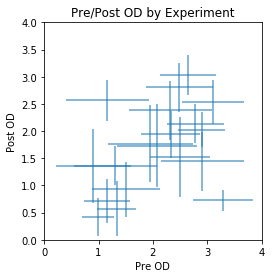

In [6]:
experiment_group_result = coa.get_per_experiment_statistics(df)
od_plot.get_per_experiment_od_plot(experiment_group_result)

In [10]:
experiment_group_result.loc[(experiment_group_result['pre_OD600', 'mean'] > 3) |  (experiment_group_result['OD600', 'mean'] > 2.5)]

experiment_id pre_OD600            \
                                                             mean       std   
3   experiment.transcriptic.r1bsqtgkytgmn_r1bsxqhkq5at9  1.163759  0.379037   
6   experiment.transcriptic.r1c5va879uaex_r1c639xp952g4  3.104256  0.407109   
10  experiment.transcriptic.r1c7cpqp2k6cw_r1c7jn9syrr8s  3.293782  0.192865   
17  experiment.transcriptic.r1c9tpk5zrbsk_r1c9wpbvjszxe  2.647216  0.371295   
18  experiment.transcriptic.r1c9tpmcezpk2_r1c9wjnedp92f  2.480449  0.458789   

       OD600            
        mean       std  
3   2.563038  0.761925  
6   2.533663  0.571339  
10  0.729368  0.552203  
17  3.029807  0.512237  
18  2.802244  0.616454

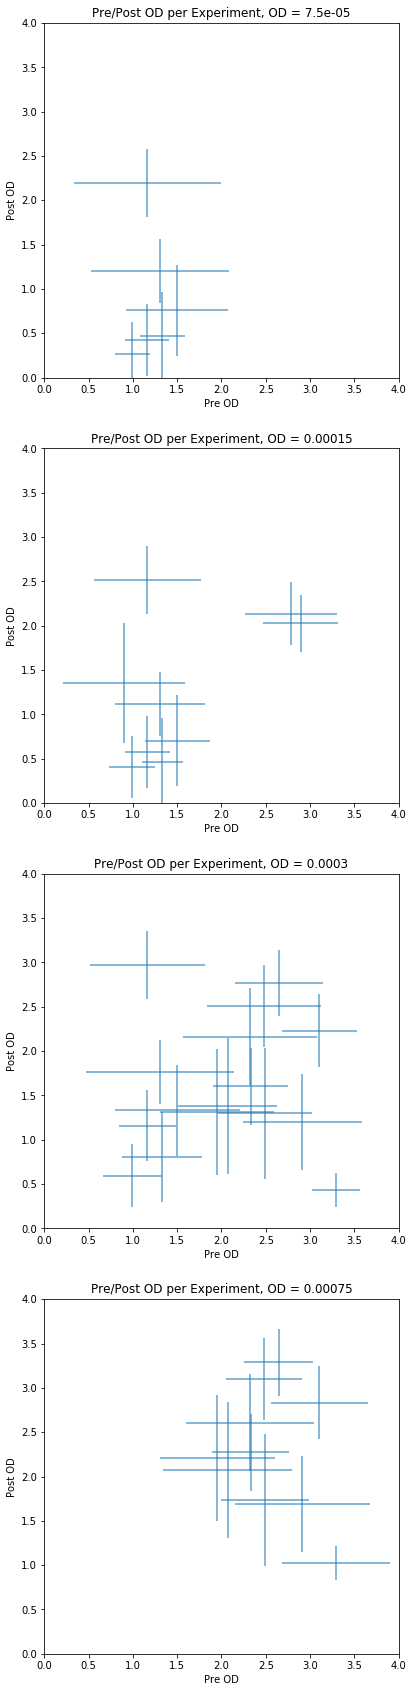

In [44]:
experiment_od_groups_result = coa.get_per_experiment_statistics_by_od(df)
plot=od_plot.get_per_experiment_od_by_od_plot(experiment_od_groups_result)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


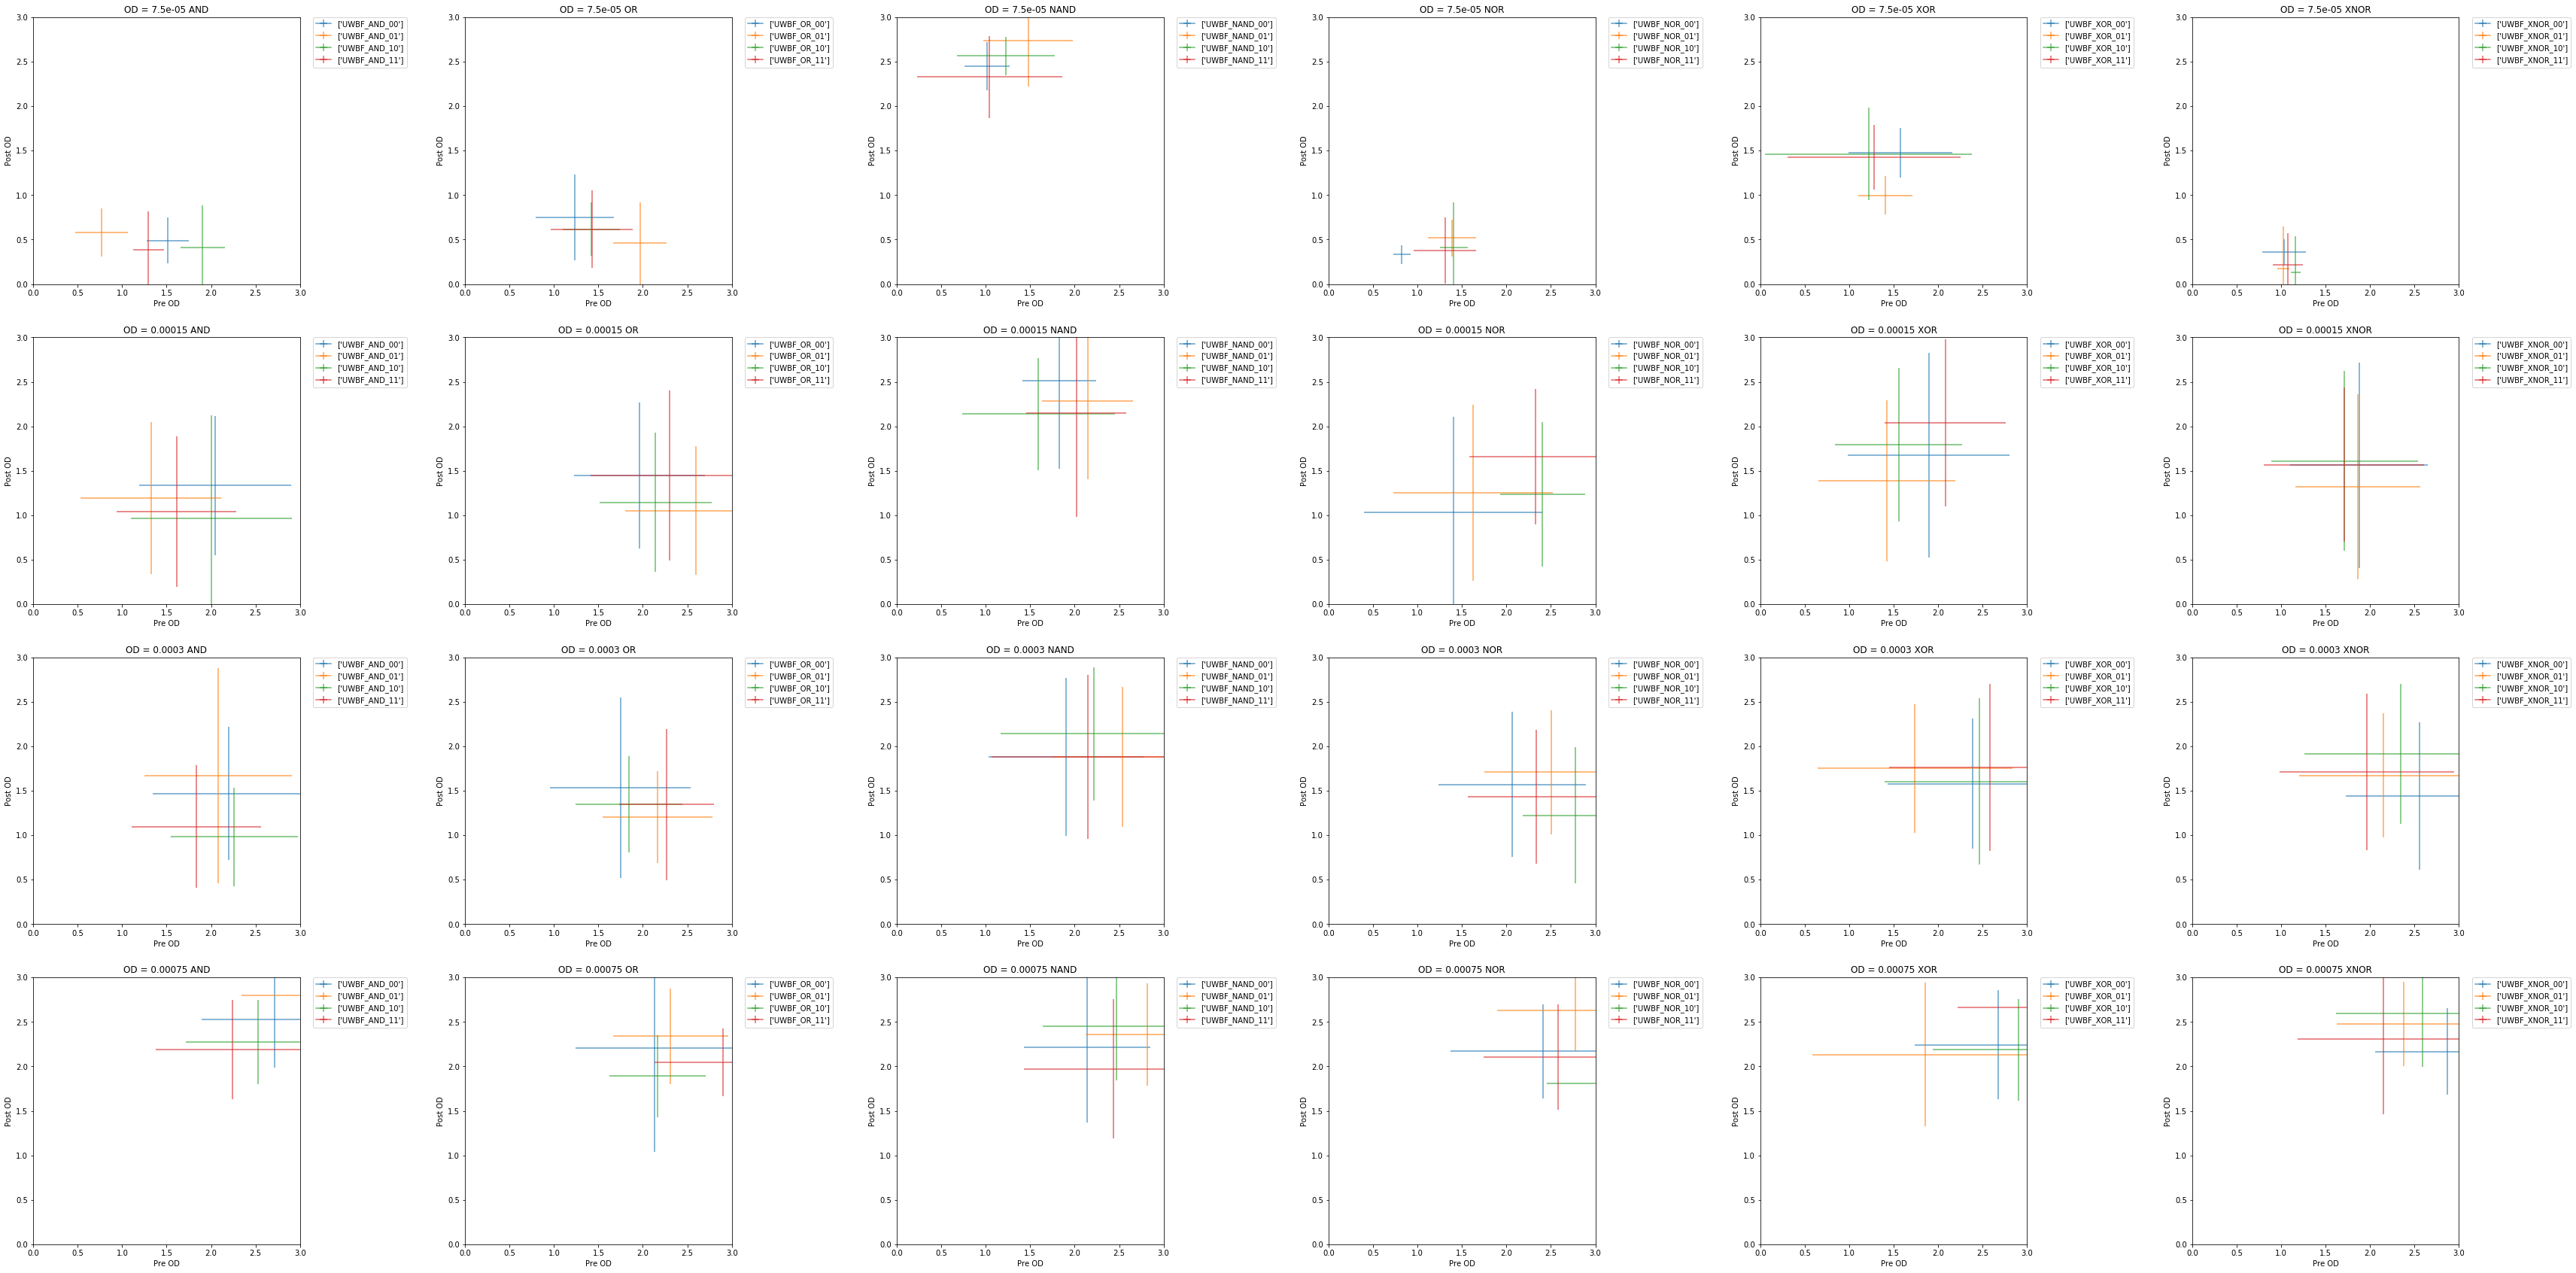

In [8]:
result = coa.get_strain_statistics_by_od(df)
plot=od_plot.get_strain_statistics_by_od_plot(result)

In [27]:
# Get ranked list of strain growth
od_groups = result.drop(columns=['pre_OD600', 'strain_circuit']).groupby(['od'])

sorted_strains = pd.DataFrame()
for i, od_group in od_groups:
    #od_group = od_group.sort_values([('OD600', 'mean')], ascending=False)

    od_group.columns = ['_'.join(col).strip() for col in od_group.columns.values]
    od = od_group['od_'].unique()[0]
    od_group = od_group.rename(index=str, columns={"OD600_mean": "Inoculation_" + str(od)})
    od_group = od_group.drop(columns=['od_', 'OD600_std'])
    if len(sorted_strains) == 0:
        sorted_strains = od_group
    else:
        sorted_strains = sorted_strains.merge(od_group, on='strain_')
sorted_strains = sorted_strains.rename(index=str, columns={"strain_": "strain" + str(od)})    
sorted_strains = sorted_strains.sort_values(['Inoculation_0.00075'], ascending=False)
sorted_strains

,strain0.00075,Inoculation_7.5e-05,Inoculation_0.00015,Inoculation_0.0003,Inoculation_0.00075
1,UWBF_AND_01,0.576487,1.193010,1.671399,2.801452
23,UWBF_XOR_11,1.423789,2.039051,1.765265,2.665118
9,UWBF_NOR_01,0.519330,1.252741,1.709858,2.633923
18,UWBF_XNOR_10,0.130776,1.611461,1.913819,2.593454
0,UWBF_AND_00,0.490819,1.334335,1.470006,2.524618
17,UWBF_XNOR_01,0.172489,1.319737,1.674221,2.476048
6,UWBF_NAND_10,2.565728,2.139537,2.141778,2.456215
5,UWBF_NAND_01,2.734772,2.287396,1.881858,2.359708
13,UWBF_OR_01,0.458684,1.051556,1.204931,2.339237
19,UWBF_XNOR_11,0.219294,1.567599,1.709942,2.309046


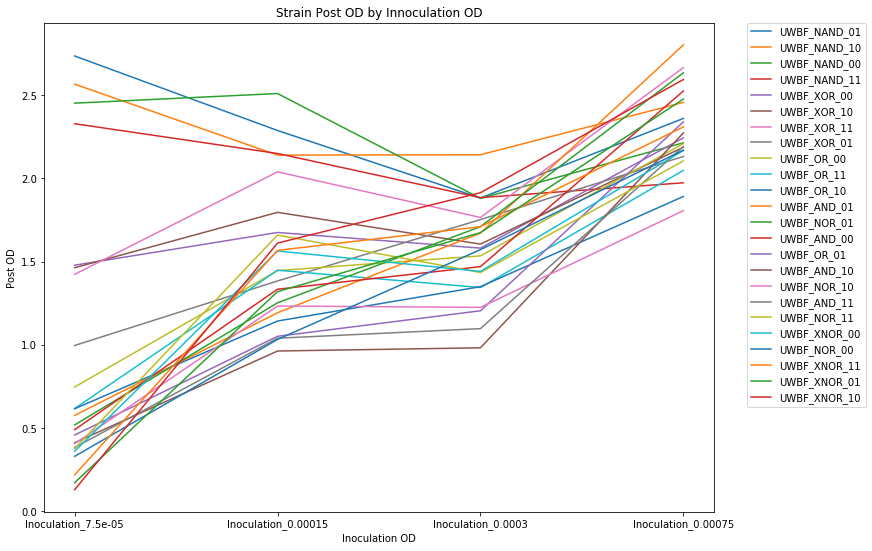

In [26]:
plot=od_plot.get_strain_growth_plot(sorted_strains)

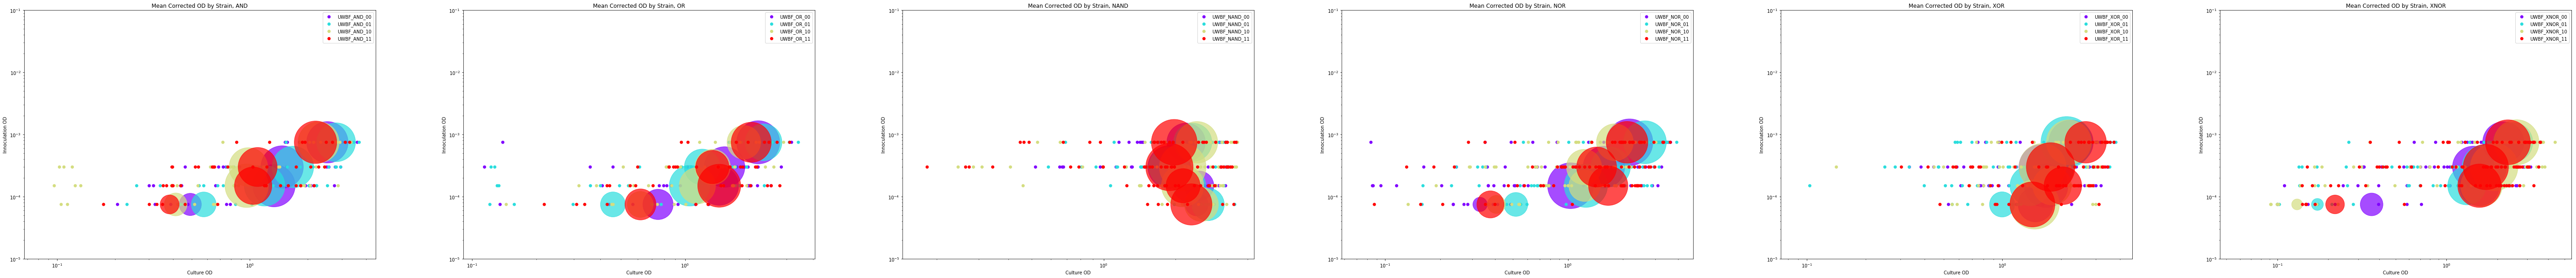

In [17]:
plot=od_plot.get_strain_by_od_plot(df, result)

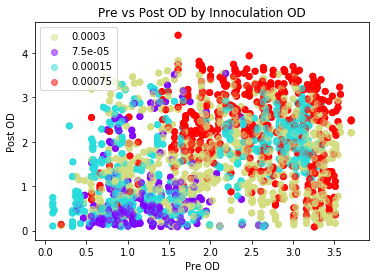

In [17]:
od_plot.get_pre_post_od_by_target_od(df)

Code needing repair/development

In [29]:
## Get Dataframe with all uncalibrated OD data

ex_ids = pipeline.get_experiment_ids(challenge_problem='YEAST_STATES', lab='Transcriptic')
out_dir = os.path.join(expanduser("~"), 'tacc-work/xplan-reactor/data/pipeline/od')
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
pipeline_od.make_raw_od_datafiles(ex_ids, out_dir)    
od_files = glob.glob(os.path.join(out_dir, "*.csv"))       
df = pipeline_od.get_all_sample_od_dataframe(od_files)
df
        
#ex_id = 'experiment.transcriptic.r1c7cpt3djxuj_r1c7fex29q6t2'


,Unnamed: 0,experiment_id,filename,gfp_1,gfp_2,gfp_201812,lab,media,od,od_1,od_2,od_201812,output,replicate,sample_id,strain,strain_circuit,strain_input_state,temperature
34,34,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/work/projects/SD2E-Community/prod/data/upload...,NaN,45003.524606,NaN,Transcriptic,Synthetic_Complete,0.000300,NaN,0.328111,NaN,NaN,1.0,sample.transcriptic.aq1bts7srqt452,W303,NaN,NaN,30.0
35,35,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/work/projects/SD2E-Community/prod/data/upload...,NaN,46335.099881,NaN,Transcriptic,Synthetic_Complete,0.000300,NaN,0.565797,NaN,1.0,3.0,sample.transcriptic.aq1bts7srqu783,UWBF_XNOR_00,XNOR,0.0,30.0
36,36,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/work/projects/SD2E-Community/prod/data/upload...,NaN,47930.814521,NaN,Transcriptic,Synthetic_Complete,0.000300,NaN,0.115834,NaN,0.0,5.0,sample.transcriptic.aq1bts7srqvab4,UWBF_XNOR_01,XNOR,1.0,30.0
37,37,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/work/projects/SD2E-Community/prod/data/upload...,NaN,46591.398715,NaN,Transcriptic,Synthetic_Complete,0.000300,NaN,0.176342,NaN,1.0,1.0,sample.transcriptic.aq1bts7srqwde5,UWBF_XNOR_11,XNOR,11.0,30.0
38,38,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/work/projects/SD2E-Community/prod/data/upload...,NaN,46369.190824,NaN,Transcriptic,Synthetic_Complete,0.000150,NaN,0.238451,NaN,NaN,3.0,sample.transcriptic.aq1bts7srqykm7,W303,NaN,NaN,30.0
39,39,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/work/projects/SD2E-Community/prod/data/upload...,NaN,49238.712539,NaN,Transcriptic,Synthetic_Complete,0.000150,NaN,0.049957,NaN,1.0,5.0,sample.transcriptic.aq1bts7srqzpq8,UWBF_XNOR_00,XNOR,0.0,30.0
40,40,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/work/projects/SD2E-Community/prod/data/upload...,NaN,46413.225163,NaN,Transcriptic,Synthetic_Complete,0.000150,NaN,0.224838,NaN,0.0,1.0,sample.transcriptic.aq1bts7srr2sta,UWBF_XNOR_10,XNOR,10.0,30.0
41,41,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/work/projects/SD2E-Community/prod/data/upload...,NaN,46285.114119,NaN,Transcriptic,Synthetic_Complete,0.000075,NaN,0.150623,NaN,NaN,5.0,sample.transcriptic.aq1bts7srr4yzc,W303,NaN,NaN,30.0
42,42,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/work/projects/SD2E-Community/prod/data/upload...,NaN,49729.589498,NaN,Transcriptic,Synthetic_Complete,0.000075,NaN,0.045381,NaN,0.0,1.0,sample.transcriptic.aq1bts7srr777d,UWBF_XNOR_01,XNOR,1.0,30.0
43,43,experiment.transcriptic.r1btfnvt57bu7_r1btpq57...,/work/projects/SD2E-Community/prod/data/upload...,NaN,49155.724302,NaN,Transcriptic,Synthetic_Complete,0.000075,NaN,0.045195,NaN,0.0,3.0,sample.transcriptic.aq1bts7srraggg,UWBF_XNOR_10,XNOR,10.0,30.0


In [64]:
## Get training data for uncalibrated OD data

X, y = pipeline_od.get_od_training_df(df)
y

34    0.000300
35    0.000300
36    0.000300
37    0.000300
38    0.000150
39    0.000150
40    0.000150
41    0.000075
42    0.000075
43    0.000075
44    0.000300
45    0.000300
46    0.000300
47    0.000300
48    0.000150
49    0.000150
50    0.000150
51    0.000150
52    0.000075
53    0.000075
54    0.000075
55    0.000300
56    0.000300
57    0.000300
58    0.000300
59    0.000150
60    0.000150
61    0.000150
62    0.000150
63    0.000075
        ...   
61    0.000300
62    0.000300
63    0.000300
64    0.000300
65    0.000300
66    0.000300
67    0.000300
68    0.000300
69    0.000750
70    0.000300
71    0.000300
72    0.000750
73    0.000300
74    0.000300
75    0.000750
76    0.000300
77    0.000750
78    0.000750
79    0.000750
80    0.000300
81    0.000300
82    0.000300
83    0.000750
84    0.000300
85    0.000300
86    0.000300
87    0.000750
88    0.000750
89    0.000750
90    0.000750
Name: input_od, Length: 3374, dtype: float64